<a href="https://colab.research.google.com/github/Geuens/Lab0-Geuens/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Upload files


In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
upload= files.upload()



KeyboardInterrupt: ignored

### Data handling

#### Data loading

In [4]:
import pandas as pd
import numpy as np


###January
df1 = pd.read_excel('2020년 1월.xlsx')
df1= df1[(df1['지역']== '인천 중구') | (df1['지역']== '인천 동구')] #there more place condition 인천 in
df1['Month'] = ['January']*(df1.shape[0])

###February
df2 = pd.read_excel('2020년 2월.xlsx')
df2= df2[(df2['지역']== '인천 중구') | (df2['지역']== '인천 동구')] #theremore place condition 인천 in
df2['Month'] = ['February']*(df2.shape[0])

###March
df3 = pd.read_excel('2020년 3월.xlsx')
df3= df3[(df3['지역']== '인천 중구') | (df3['지역']== '인천 동구')] #there more place condition 인천 in
df3['Month'] = ['March']*(df3.shape[0])

###............. rest of months............

#### concatenate all motnhs

df= pd.concat([df1,df2,df3])

print(df)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


           지역      망   측정소코드 측정소명  ...  PM10  PM25                      주소    Month
339776  인천 중구   도시대기  823611   신흥  ...  19.0   9.0  인천 중구 서해대로 471(신흥동 2가)  January
339777  인천 중구   도시대기  823611   신흥  ...  19.0  10.0  인천 중구 서해대로 471(신흥동 2가)  January
339778  인천 중구   도시대기  823611   신흥  ...  21.0  11.0  인천 중구 서해대로 471(신흥동 2가)  January
339779  인천 중구   도시대기  823611   신흥  ...  22.0  12.0  인천 중구 서해대로 471(신흥동 2가)  January
339780  인천 중구   도시대기  823611   신흥  ...  23.0  10.0  인천 중구 서해대로 471(신흥동 2가)  January
...       ...    ...     ...  ...  ...   ...   ...                     ...      ...
366831  인천 동구  도로변대기  823703   송현  ...  27.0  13.0           인천 동구 수문통로 77    March
366832  인천 동구  도로변대기  823703   송현  ...  36.0  17.0           인천 동구 수문통로 77    March
366833  인천 동구  도로변대기  823703   송현  ...  44.0  20.0           인천 동구 수문통로 77    March
366834  인천 동구  도로변대기  823703   송현  ...  38.0  16.0           인천 동구 수문통로 77    March
366835  인천 동구  도로변대기  823703   송현  ...  34.0  14.0           인천 동구 수문통로 77  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
#infromation on poluant
mean_PM25= df['PM25'].mean() ### for SO2,NO2,CO,O3,  PM10,PM2.5
df['PM25'].describe()

count    8532.000000
mean       23.388889
std        15.152906
min         0.000000
25%        11.000000
50%        21.000000
75%        33.000000
max       100.000000
Name: PM25, dtype: float64

In [6]:
#information by month, city and hours-> what should be represented in matplotlib
by_month=df.groupby('Month')
by_city=df.groupby('지역')
by_hour=df.groupby('측정일시')

In [7]:
month_mean=by_month.mean()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
Month,,,,,,,,
February,823649.8,2.020022e+09,0.004304,0.633309,0.022541,0.029350,36.755393,22.424431
January,823649.8,2.020012e+09,0.005204,0.694437,0.020010,0.028331,42.572934,26.784354
March,823649.8,2.020032e+09,0.004181,0.539473,0.030495,0.026124,43.411153,20.927323


In [8]:
city_mean=by_city.mean()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
지역,,,,,,,,
인천 동구,823662.000000,2.020022e+09,0.004775,0.641911,0.022224,0.031902,43.327163,25.556281
인천 중구,823641.666667,2.020022e+09,0.004338,0.597930,0.027097,0.024183,39.193977,21.195944


In [10]:
hour_mean=by_hour.mean()

,측정소코드,SO2,CO,O3,NO2,PM10,PM25
측정일시,,,,,,,
2020010101,823649.8,0.00375,0.525,0.00575,0.036000,21.50,11.75
2020010102,823649.8,0.00375,0.550,0.00600,0.034000,21.75,11.50
2020010103,823649.8,0.00350,0.500,0.00625,0.032667,23.25,12.50
2020010104,823649.8,0.00375,0.525,0.00675,0.030333,21.25,12.75
2020010105,823649.8,0.00350,0.550,0.00475,0.032333,23.00,12.75
...,...,...,...,...,...,...,...
2020033120,823649.8,0.00460,0.520,0.02720,0.035400,37.40,15.75
2020033121,823649.8,0.00360,0.540,0.04100,0.022000,39.80,17.00
2020033122,823649.8,0.00400,0.540,0.02440,0.037600,46.80,19.75


#### Data visualization

In [11]:
### data to represent

month_mean=by_month.mean()
city_mean=by_city.mean()
hour_mean=by_hour.mean().reset_index()

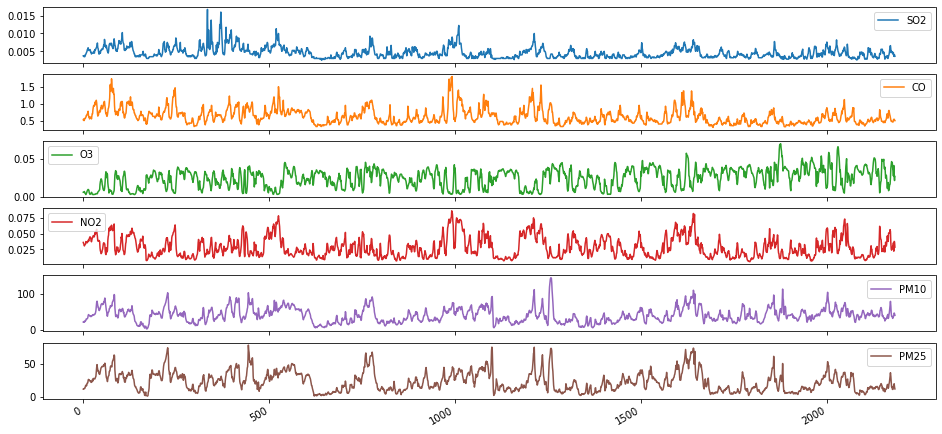

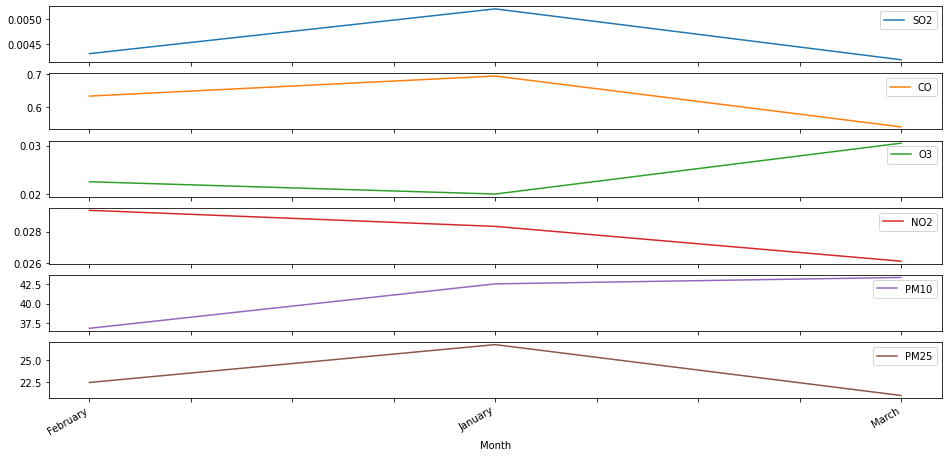

In [33]:
import matplotlib.pyplot as plt

hour_mean.plot(subplots=True, y=["SO2",	"CO",	"O3",	"NO2",	"PM10",	"PM25"],figsize=(16, 8))
plt.show()

month_mean.plot(subplots=True, y=["SO2",	"CO",	"O3",	"NO2",	"PM10",	"PM25"],figsize=(16, 8))
plt.show()

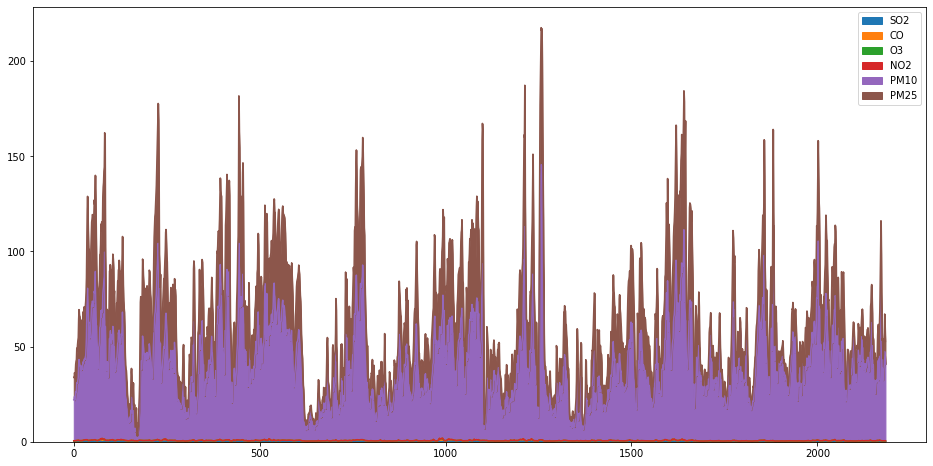

In [36]:
hour_mean.plot.area( y=["SO2","CO",	"O3",	"NO2",	"PM10",	"PM25"],figsize=(16, 8))
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee28fac190>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

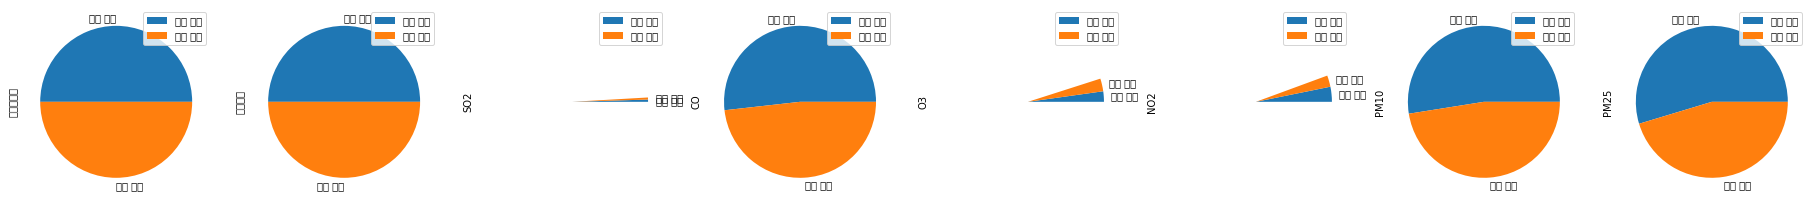

In [31]:
city_mean.plot.pie(subplots=True, figsize=(32, 16))